In [1]:
import numpy as np
raw_data = np.genfromtxt('/home/uk/dev_ws/DeepLearning/data/1.14_data/x09.txt',skip_header=36)    # np.genfromtxt 는 텍스트파일로부터 데이터를 읽어 배열로 변환하는 함수
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

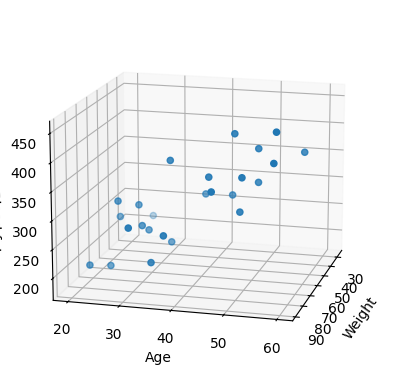

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [3]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

y_data = y_data.reshape((25,1))

In [10]:
import tensorflow as tf
from tensorflow import keras 

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1,input_shape=(2,)),
])

model.compile(optimizer='rmsprop', loss='mse')

In [11]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 88817.8516
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 88612.8203
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 88464.3203
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 88340.1016
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 88229.9531
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 88129.0938
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 88034.8672
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 87945.6406
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 87860.2812
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 87778.0391
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 87698.3203
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 87620.6875
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 87544.8438
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 87470.4609
Epoch 15/5000


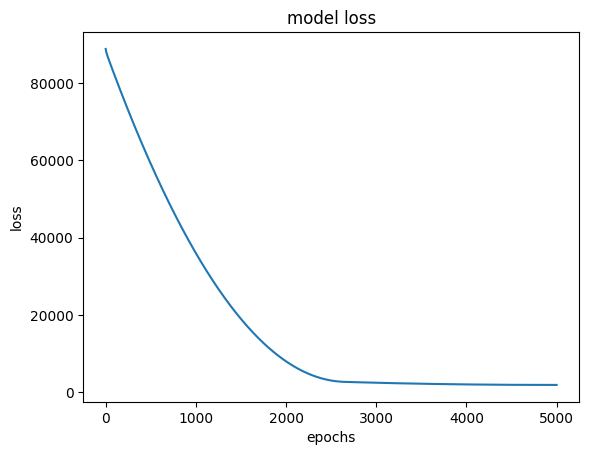

In [13]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [14]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[374.88498]], dtype=float32)

In [15]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[219.1188]], dtype=float32)

In [16]:
W_, b_ = model.get_weights()
print(W_ , b_)

[[1.2485801]
 [5.569629 ]] [4.963289]


In [17]:
x = np.linspace(20,100,50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

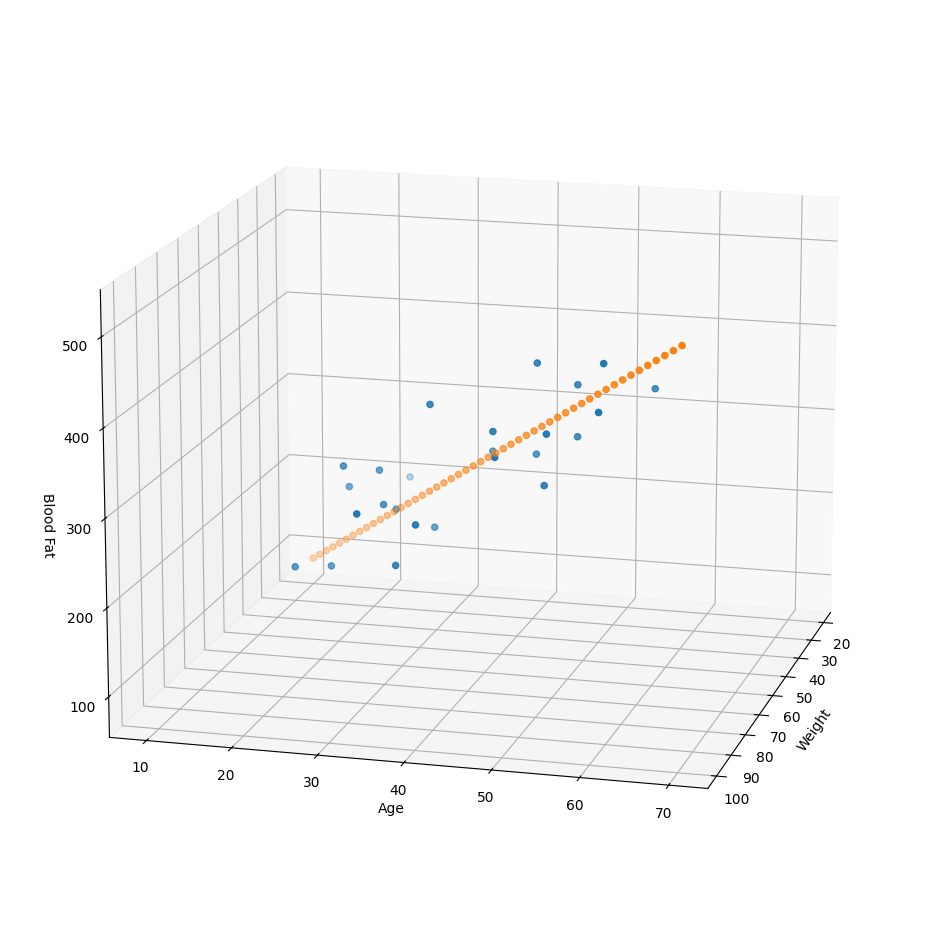

In [18]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x,y,Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel("Blood Fat")
ax.view_init(15,15)
plt.show()

In [19]:
import numpy as np

X = np.array([ [0,0],
              [1,0],
              [0,1],
              [1,1] ])
y = np.array([[0], [1], [1], [0]])

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [24]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
hist = model.fit(X,y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2812  
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2718 
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1974 
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2720 
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2548 
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2583 
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2373 
Epoch 8/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3297 
Epoch 9/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2467 
Epoch 10/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3193 
Epoch 11/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3211 
Epoch 12/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2112 
Epoch 13/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2426 
Epoch 14/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3153 
Epoch 15/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2470 
Epo

In [26]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.07754684],
       [0.92925984],
       [0.9292387 ],
       [0.08586283]], dtype=float32)

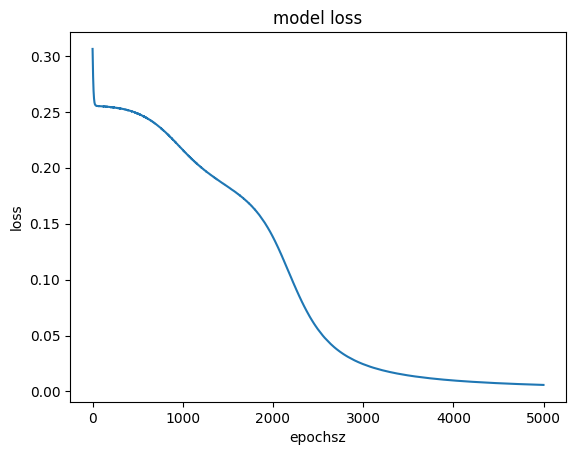

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochsz')
plt.show()

In [28]:
for w in model.weights:
    print('---')
    print(w)

---
<Variable path=sequential_5/dense_6/kernel, shape=(2, 2), dtype=float32, value=[[-4.1526456  6.3079896]
 [-4.152078   6.30378  ]]>
---
<Variable path=sequential_5/dense_6/bias, shape=(2,), dtype=float32, value=[ 6.198472 -2.715714]>
---
<Variable path=sequential_5/dense_7/kernel, shape=(2, 1), dtype=float32, value=[[6.577063]
 [6.35581 ]]>
---
<Variable path=sequential_5/dense_7/bias, shape=(1,), dtype=float32, value=[-9.43427]>


In [63]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [64]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y),1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [66]:
enc.categories_

[array([0, 1, 2])]

In [67]:
y_onehot = enc.transform(y.reshape(len(y),1))
y_onehot

# sparse = False 를 적으면 희소 행렬로 적어준다 특정 위치에만 1이고 나머지는 0인 행렬 나타냄 
# 만약 적어주지 않는다면
#   (0, 2)        1.0
#   (1, 0)        1.0
#   (2, 2)        1.0
#   (3, 1)        1.0
# 이런식으로 나오게 됨

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

/home/uk/venv/eda_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy',     #
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,371 (9.26 KB)

 Trainable params: 2,371 (9.26 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3250 - loss: 1.2041  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3392 - loss: 1.1266 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5050 - loss: 1.0873 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6600 - loss: 1.0463 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6590 - loss: 1.0093 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7844 - loss: 0.9769 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7869 - loss: 0.9442 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7904 - loss: 0.9024 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8246 - loss: 0.8592
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8110 - loss: 0.8257
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8642 - loss: 0.7613 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8948 - lo

In [72]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - 164ms/step - accuracy: 0.9667 - loss: 0.0834


[0.08342825621366501, 0.9666666388511658]

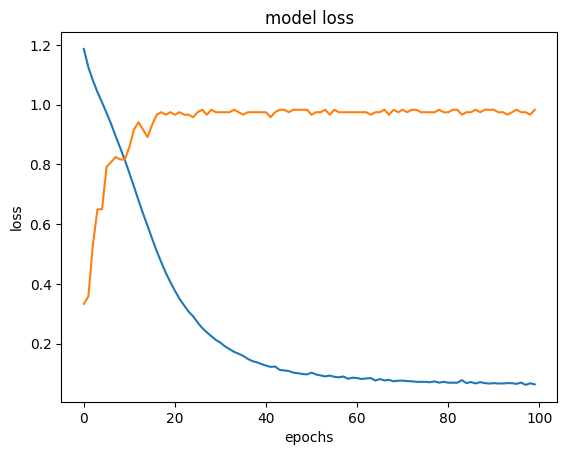

In [73]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()